# Text<>MIDI

In [2]:
!pip install pygame

In [3]:
import pygame

pygame 2.6.1 (SDL 2.28.4, Python 3.12.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [4]:
def play_midi(file_path):
    pygame.mixer.init()
    pygame.mixer.music.load(file_path)
    pygame.mixer.music.play()

using pygame to play midi

## MIDI File Structures

In [7]:
play_midi('sounds/piano.mid')

original file

In [8]:
midi_txt = open("sounds/piano.mid", "rb").read()

In [9]:
print(midi_txt)

b"MThd\x00\x00\x00\x06\x00\x00\x00\x01\x00`MTrk\x00\x00\x03\xca\x00\xff\x03\x05piano\x00\xffX\x04\x04\x02$\x08\x00\xffX\x04\x04\x02$\x08\x00\x90'@\x00\x90.G\x00\x903H\x00\x907B\x00\x90?I_\x807@\x01\x80.@\x00\x90.C\x00\x803@\x00\x903H\x00\x9078\x00\x80?@\x00\x90?M_\x80'@)\x807@\x04\x80?@\x04\x803@\x00\x903O\x00\x907P\x00\x90:O\x00\x90?T*\x80.@\x02\x807@\x10\x803@\x1a\x80:@\x01\x80?@\t\x900Q\x00\x905F\x00\x9086\x00\x90:E\x00\x90?I`\x80:@&\x808@8\x800@\x00\x805@\x02\x900Q\x00\x905C\x00\x908E\x00\x80?@\x00\x90?OX\x808@\x05\x800@\x00\x80?@\x03\x900I\x00\x90:O\x00\x90?SA\x80:@\x1c\x80?@\x00\x805@\x03\x903M\x00\x90<M\x00\x90?M\x00\x800@\x81\x0c\x803@\x04\x903G\x81\x0c\x80?@\x04\x90?KY\x80?@\x01\x803@\x00\x80<@\x06\x90:D\x00\x90<K\x00\x90?J\x81@\x903P\x00\x80:@\x00\x90:D\x00\x80<@\x00\x90<E\x00\x80?@\x00\x90?RX\x80:@\x02\x80<@\x00\x80?@\x06\x908E\x00\x90:S\x00\x90<Y\x00\x90?T\x00\x90V>'\x803@\x0c\x808@\x0b\x80<@ \x80:@\x00\x80?@\x00\x80V@\x02\x90.K\x00\x903@\x00\x9073\x00\x90:I\x00\x90?M\x00\x

### MIDI header chunk
MThd\x00\x00\x00\x06\x00\x00\x00\x01\x00`
#### MThd
header identifier
#### \x00\x00\x00\x06 
four bytes indicating the chunk length (in this case 6 bytes)
#### \x00\x00: 
MIDI format type, 0 means single-track
#### \x00\x01: 
number of tracks (1 track)
#### `\x00`` (0x60 in hex = 96):

ticks per quarter note (timing resolution)
#### MTrk

track chunk identifier

## Manipulating MIDI

### MIDI Encoding
#### MIDI uses a single byte (8 bits) encoding, ranges from 0 to 127, 0x00 to 0x7F in hexadecimal. 
#### It follows [Status Byte] [Note Number] [Velocity]. MIDI keyboards usually use 64 as the default or neutral velocity.
#### Note-on: 0x90, Note-off: 0x80
example: 0x90 3C 40 means Note-On, Middle C, Velocity 64.

In [10]:
import random

In [11]:
midi_data = bytearray(open("sounds/piano.mid", "rb").read())

convert to bytearray
bytearray: https://www.programiz.com/python-programming/methods/built-in/bytearray

In [12]:
for i in range(len(midi_data) - 2):
    if midi_data[i] in [0x90, 0x80]:  # detect if the note is on or off
        midi_data[i+1] = random.randint(20, 90)  # randomize the pitch

In [13]:
with open("sounds/modified_piano.mid", "wb") as file:
    file.write(midi_data)

write midi data

In [14]:
play_midi("sounds/modified_piano.mid")

### MIDI to Text

In [15]:
latin_text = open("sounds/piano.mid", "r", encoding="latin1").read()

In [16]:
print(latin_text)

MThd       `MTrk  Ê ÿpiano ÿX ÿX '@ .G 3H 7B ?I_7@.@ .C 3@ 3H 78 ?@ ?M_'@)7@?@3@ 3O 7P :O ?T*.@7@3@:@?@	0Q 5F 86 :E ?I`:@&8@80@ 5@0Q 5C 8E ?@ ?OX8@0@ ?@0I :O ?SA:@?@ 5@3M <M ?M 0@3@3G?@?KY?@3@ <@:D <K ?J@3P :@ :D <@ <E ?@ ?RX:@<@ ?@8E :S <Y ?T V>'3@8@<@ :@ ?@ V@.K 3@ 73 :I ?M C8 V;0'AP.@3@ 7@V@'@:@ ?@ C@'D .J 3N 7= :M ?R CD.@C@7@3@ :@3Q 7F :Q C@ RG%7@'@	'< /AC@
3@/@
?@:@0P 5K 8A ?K R@ RF'@FR@D8@4(7 0@ 0O 8G ?@ ?M KHW0@ 8@ ?@ K@(0G 8Q ?N KM-8@(:(0@5@?@ K@3P :\ ?O KD(@'3@:@3H <J\?@ K@3@ 3Q :O <@ <Q ?M KL3@ :@ ?@ K@+, 3D 8; :R ?U KBR+@8@<@3@ :@ ?@ K@3H 8A :J <P ?J KBc8@\K@3@ 3B :@ :T ?@ ?R KdTK@3@?@:@<@3N 8K :R <O ?S Od)8@2S<@3@!2@:@'> 0S :Z ?@ ?W O@%'0@:@ ?@ ÿ/ 


### MIDI to Image

In [17]:
from PIL import Image, ImageOps, ImageFilter

In [18]:
piano_bytes = open("sounds/piano.mid", "rb").read()

In [19]:
width = 30
padded_text_bytes = piano_bytes + (b' ' * width * 3)
height = int((len(padded_text_bytes) / 3) / width)

In [20]:
piano_img = Image.frombytes('RGB', (width, height), padded_text_bytes)

In [21]:
def show_scaled(img, scale=20):
    return img.resize((img.width*scale, img.height*scale))

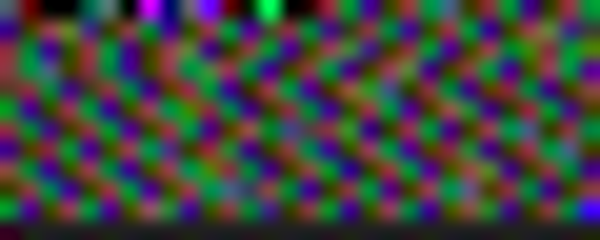

In [22]:
show_scaled(piano_img)

In [24]:
modified_piano_bytes = open("sounds/modified_piano.mid", "rb").read()

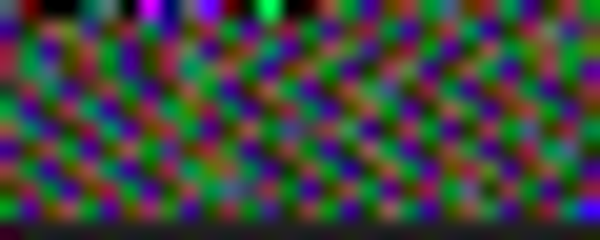

In [25]:
width = 30
padded_text_bytes = modified_piano_bytes + (b' ' * width * 3)
height = int((len(padded_text_bytes) / 3) / width)
modified_piano_img = Image.frombytes('RGB', (width, height), padded_text_bytes)
show_scaled(modified_piano_img)

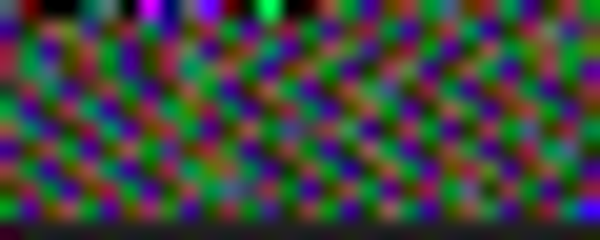

In [26]:
def show_scaled(img, scale=20):
    return img.resize((img.width*scale, img.height*scale))
show_scaled(modified_piano_img)

In [27]:
width = 30 # arbitrary, adjust to taste
padded_text_bytes = modified_piano_bytes + (b' ' * width * 3)
height = int((len(padded_text_bytes) / 3) / width)
modified_piano_img = Image.frombytes('RGB', (width, height), padded_text_bytes)

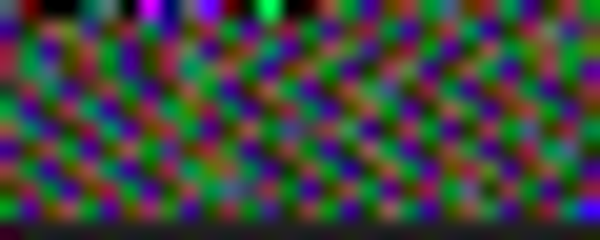

In [28]:
def show_scaled(img, scale=20):
    return img.resize((img.width*scale, img.height*scale))
show_scaled(modified_piano_img)

In [29]:
modified_piano_img.save("modified_piano_img.png")

## Text to MIDI

In [30]:
text = "hi this is Yifan"

In [31]:
filename="sounds/output.mid"

In [32]:
header_chunk = b"MThd" + b"\x00\x00\x00\x06" + b"\x00\x00" + b"\x00\x01" + b"\x01\xE0"
track_data = b"" #this is a place holder, empty byte string

1. header chunk identifier + header chunk size: 6 bytes + MIDI format: single-track file +  1 track + tempo: 480 ticks per quarter note

In [33]:
for char in text:
    midi_note = (ord(char) % 128) 
    track_data += b"\x00" + bytes([0x90, midi_note, 64]) #note on
    track_data += b"\x20" + bytes([0x80, midi_note, 64]) #note off

2. converts the character to a MIDI note
3. b"\x00" + bytes([0x90, midi_note, 64]) creates a note-on event at velocity 64
4. b"\x20" + bytes([0x80, midi_note, 64]) creates a note-off event after some delay as of \x20


In [34]:
track_data += b"\x00\xFF\x2F\x00"

5. add an end mark to the track

In [35]:
track_chunk = b"MTrk" + bytes([
    (len(track_data) >> 24) & 0xFF,
    (len(track_data) >> 16) & 0xFF,
    (len(track_data) >> 8) & 0xFF,
    len(track_data) & 0xFF
]) + track_data

7. b"MTrk" is the track chunk identifier
8. parse track data length in 4 bytes
9. get track_data which was stored earlier

The MIDI file format requires the length field to be exactly 4 bytes long (32 bits). Computers store numbers as a sequence of bytes, and MIDI expects this length in big-endian order (most significant byte first). If we only store len(track_data), it would be a single number, not a properly formatted 4-byte field.

In [36]:
with open(filename, "wb") as f:
    f.write(header_chunk + track_chunk)
print("File generated")

File generated


10. add header_chunk and track_chunk together

In [37]:
play_midi("sounds/output.mid")

In [38]:
text_from_file = open("frost.txt", "r", encoding="utf-8").read()
text = text_from_file.strip()
print(f"Text from file: {text}")

Text from file: Two roads diverged in a yellow wood
And sorry I could not travel both
And be one traveler long I stood
And looked down one as far as I could
To where it bent in the undergrowth


# Takeaway

## patterns of sound <> patterns of text/language